In [ ]:
from google.cloud import bigquery

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

%matplotlib inline

# 1. Extract Data and Confirm Structure/Contents

In [ ]:
# Create client object
client = bigquery.Client()
# Create dataset reference
dataset_ref = client.dataset("google_analytics_sample", project="bigquery-public-data")
# Retrieve dataset from reference
dataset = client.get_dataset(dataset_ref)

In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [ ]:
# Check available tables in the dataset
for x in client.list_tables(dataset):
    print(x.table_id)

ga_sessions_20160801
ga_sessions_20160802
ga_sessions_20160803
ga_sessions_20160804
ga_sessions_20160805
ga_sessions_20160806
ga_sessions_20160807
ga_sessions_20160808
ga_sessions_20160809
ga_sessions_20160810
ga_sessions_20160811
ga_sessions_20160812
ga_sessions_20160813
ga_sessions_20160814
ga_sessions_20160815
ga_sessions_20160816
ga_sessions_20160817
ga_sessions_20160818
ga_sessions_20160819
ga_sessions_20160820
ga_sessions_20160821
ga_sessions_20160822
ga_sessions_20160823
ga_sessions_20160824
ga_sessions_20160825
ga_sessions_20160826
ga_sessions_20160827
ga_sessions_20160828
ga_sessions_20160829
ga_sessions_20160830
ga_sessions_20160831
ga_sessions_20160901
ga_sessions_20160902
ga_sessions_20160903
ga_sessions_20160904
ga_sessions_20160905
ga_sessions_20160906
ga_sessions_20160907
ga_sessions_20160908
ga_sessions_20160909
ga_sessions_20160910
ga_sessions_20160911
ga_sessions_20160912
ga_sessions_20160913
ga_sessions_20160914
ga_sessions_20160915
ga_sessions_20160916
ga_sessions_2

In [ ]:
# Create table reference
table_ref_20160801 = dataset_ref.table('ga_sessions_20160801')

# Retrieve table from reference
table_20160801 = client.get_table(table_ref_20160801)

# View columns
client.list_rows(table_20160801, max_results=5).to_dataframe()

,visitorId,visitNumber,visitId,visitStartTime,date,totals,trafficSource,device,geoNetwork,customDimensions,hits,fullVisitorId,userId,channelGrouping,socialEngagementType
0,<NA>,1,1470046245,1470046245,20160801,"{'visits': 1, 'hits': 24, 'pageviews': 17, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Firefox', 'browserVersion': 'not ...","{'continent': 'Europe', 'subContinent': 'Weste...","[{'index': 4, 'value': 'EMEA'}]","[{'hitNumber': 1, 'time': 0, 'hour': 3, 'minut...",895954260133011192,None,Organic Search,Not Socially Engaged
1,<NA>,1,1470084717,1470084717,20160801,"{'visits': 1, 'hits': 24, 'pageviews': 18, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Internet Explorer', 'browserVersi...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 13, 'minu...",0288478011259077136,None,Direct,Not Socially Engaged
2,<NA>,3,1470078988,1470078988,20160801,"{'visits': 1, 'hits': 27, 'pageviews': 17, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Safari', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 12, 'minu...",6440789996634275026,None,Organic Search,Not Socially Engaged
3,<NA>,4,1470075581,1470075581,20160801,"{'visits': 1, 'hits': 27, 'pageviews': 19, 'ti...","{'referralPath': '/', 'campaign': '(not set)',...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 11, 'minu...",8520115029387302083,None,Referral,Not Socially Engaged
4,<NA>,30,1470099026,1470099026,20160801,"{'visits': 1, 'hits': 27, 'pageviews': 17, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 17, 'minu...",6792260745822342947,None,Organic Search,Not Socially Engaged


Some columns such as totals, trafficSource, device, geoNetwork, customDimensions, and hits contain nested data, hence, we would want to check the data schema of them.

In [ ]:
#Display schemas
print("SCHEMA field for the 'totals' column:\n")
print(table_20160801.schema[5])

print("\nSCHEMA field for the 'trafficSource' column:\n")
print(table_20160801.schema[6])

print("\nSCHEMA field for the 'device' column:\n")
print(table_20160801.schema[7])

print("\nSCHEMA field for the 'geoNetwork' column:\n")
print(table_20160801.schema[8])

print("\nSCHEMA field for the 'customDimensions' column:\n")
print(table_20160801.schema[9])

print("\nSCHEMA field for the 'hits' column:\n")
print(table_20160801.schema[10])

SCHEMA field for the 'totals' column:

SchemaField('totals', 'RECORD', 'NULLABLE', None, None, (SchemaField('visits', 'INTEGER', 'NULLABLE', None, None, (), None), SchemaField('hits', 'INTEGER', 'NULLABLE', None, None, (), None), SchemaField('pageviews', 'INTEGER', 'NULLABLE', None, None, (), None), SchemaField('timeOnSite', 'INTEGER', 'NULLABLE', None, None, (), None), SchemaField('bounces', 'INTEGER', 'NULLABLE', None, None, (), None), SchemaField('transactions', 'INTEGER', 'NULLABLE', None, None, (), None), SchemaField('transactionRevenue', 'INTEGER', 'NULLABLE', None, None, (), None), SchemaField('newVisits', 'INTEGER', 'NULLABLE', None, None, (), None), SchemaField('screenviews', 'INTEGER', 'NULLABLE', None, None, (), None), SchemaField('uniqueScreenviews', 'INTEGER', 'NULLABLE', None, None, (), None), SchemaField('timeOnScreen', 'INTEGER', 'NULLABLE', None, None, (), None), SchemaField('totalTransactionRevenue', 'INTEGER', 'NULLABLE', None, None, (), None), SchemaField('sessionQu

#2. Steps for Analysis
After confirming the content and structure of the data that we'll be working with, we can now define our goals in more detail.

- Analyze which pages are the most popular, as well as their bounce/exit rates
- Examine number of sessions by browser and device
- Explore the type and quality of site traffic
- Identify the customer conversion path and any potential bottlenecks
- Identify the best-selling product categories and forecast their demand

# Most Popular Pages
First, let's look at the most frequently visited landing pages and their respective bounce rates.

The bounce rate is the number of bounces (sessions where the user entered the site and then immediately left) divided by the total number of sessions.

A high bounce rate can indicate either:

Users are not seeing what they expect when they enter the site, and Search Engine Optimization (SEO) needs to be done
There is a functionality or display issue with the landing page

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
%load_ext google.colab.data_table

In [ ]:
%unload_ext google.colab.data_table

In [ ]:
project_id = 'balmy-moonlight-391409'

In [ ]:
project_id = 'bigquery-public-data'

In [ ]:
# 「ｈitＮumber=1」Indicates the first hit of a session
from google.cloud import bigquery

client = bigquery.Client(project=project_id)

sample_count = 2000
row_count = client.query(
"""
        SELECT
            hits.page.pagePath AS landing_page,
            COUNT(*) AS views,
            SUM(totals.bounces)/COUNT(*) AS bounce_rate
        FROM
            `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
                 UNNEST(hits) AS hits
        WHERE
            _TABLE_SUFFIX BETWEEN '20160801' AND '20170801'
            AND
            hits.type='PAGE'
            AND
            hits.hitNumber=1
        GROUP BY landing_page
        ORDER BY views DESC
        LIMIT 10
        """)
result = row_count.result().to_dataframe()
result.head(10)

,landing_page,views,bounce_rate
0,/home,612140,0.495475
1,/google+redesign/shop+by+brand/youtube,81512,0.562347
2,/google+redesign/apparel/men++s/men++s+t+shirts,20685,0.441141
3,/signin.html,16296,0.361622
4,/google+redesign/apparel/mens/mens+t+shirts,12691,0.475061
5,/basket.html,9431,0.454565
6,/google+redesign/drinkware,8833,0.533794
7,/google+redesign/bags,8608,0.451208
8,/google+redesign/apparel/men++s/men++s+outerwear,6345,0.432782
9,/google+redesign/apparel,6326,0.448150


Let's take a look at the exit rate next.

The exit rate is similar to the bounce rate, except that it is calculated for all pages and not just landing pages. It is the number of exits (sessions where the user navigated to a page and then exited the site) divided by the total number of sessions.

A high exit rate can indicate either:

Users are not seeing what they expect when they navigate to a page
There is a functionality or display issue with the page

In [ ]:
query = """
        SELECT
            hits.page.pagePath AS page,
            COUNT(*) AS views,
            SUM(totals.bounces)/COUNT(*) AS exit_rate
        FROM
            `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
                 UNNEST(hits) AS hits
        WHERE
            _TABLE_SUFFIX BETWEEN '20160801' AND '20170801'
            AND
            hits.type='PAGE'
        GROUP BY page
        ORDER BY views DESC
        """

result = client.query(query).result().to_dataframe()
result.head(20)

,page,views,exit_rate
0,/home,981285,0.309920
1,/basket.html,209360,0.020524
2,/google+redesign/shop+by+brand/youtube,145026,0.316198
3,/signin.html,101299,0.058322
4,/store.html,93551,0.025505
5,/google+redesign/apparel/men++s/men++s+t+shirts,67471,0.135392
6,/asearch.html,62380,0.031677
7,/google+redesign/electronics,56839,0.047116
8,/google+redesign/apparel,56552,0.050272
9,/google+redesign/bags,53686,0.072458


Compared with other pages, exit rates for pages related to Men's Apparel are slightly high, and the exit rate for YouTube is very high.

Browser and Device
Next, let's look at sessions by browser and device to see if there are any compatibility issues.

In [ ]:
query = """
        SELECT
            device.Browser AS browser,
            COUNT(*) AS sessions,
            SUM(totals.bounces)/COUNT(*) AS exit_rate
        FROM
            `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
                 UNNEST(hits) AS hits
        WHERE
            _TABLE_SUFFIX BETWEEN '20160801' AND '20170801'
        GROUP BY browser
        ORDER BY sessions DESC
        LIMIT 10
        """

result = client.query(query).result().to_dataframe()
result.sort_values(by='exit_rate',ascending=True, inplace=True)
result.head(10)

,browser,sessions,exit_rate
0,Chrome,3197849,0.091878
4,Edge,38063,0.150934
1,Safari,629906,0.157622
2,Firefox,133880,0.168195
5,Android Webview,25979,0.174872
3,Internet Explorer,62405,0.190369
7,Opera,15439,0.209988
6,Safari (in-app),19037,0.213532
9,UC Browser,5807,0.283968
8,Opera Mini,12767,0.314639


Among the top 5 browsers, the exit rate for Chrome is comparatively low at 9%, while the other browsers are roughly 7% - 8% higher with the exception of Internet Explorer, having an exit rate of 19%.

In [ ]:
query = """
        SELECT
            device.deviceCategory AS device,
            COUNT(*) AS sessions,
            SUM(totals.bounces)/COUNT(*) AS exit_rate
        FROM
            `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
                 UNNEST(hits) AS hits
        WHERE
            _TABLE_SUFFIX BETWEEN '20160801' AND '20170801'
        GROUP BY device
        ORDER BY sessions DESC
        """

result = client.query(query).result().to_dataframe()
result.sort_values(by='exit_rate',ascending=False, inplace=True)
result.head(10)

,device,sessions,exit_rate
1,mobile,838327,0.130486
2,tablet,144004,0.105907
0,desktop,3171344,0.104038


Looking at the exit rates, we can see that Mobile is about 2.5% higher than other devices. It's possible that the site is not optimized for mobile viewing.



#Traffic Type and Quality
Now let's examine session and transaction data for each source of traffic to our site.

In [ ]:
query = """
        SELECT
            trafficSource.medium AS medium,
            COUNT(*) AS sessions,
            SUM(totals.bounces)/COUNT(*) AS exit_rate,
            SUM(totals.transactions) AS transactions,
            SUM(totals.totalTransactionRevenue)/1000000 AS total_revenue,
            SUM(totals.transactions)/COUNT(*) AS conversion_rate
        FROM
            `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
                 UNNEST(hits) AS hits
        WHERE
            _TABLE_SUFFIX BETWEEN '20160801' AND '20170801'
        GROUP BY medium
        ORDER BY sessions DESC
        LIMIT 10
        """

result = client.query(query).result().to_dataframe()
result.head(10)

,medium,sessions,exit_rate,transactions,total_revenue,conversion_rate
0,(none),2246040,0.069684,363228,69842914.68,0.161719
1,organic,1141113,0.101857,97332,19504702.25,0.085296
2,referral,580309,0.285806,22040,3501224.27,0.037980
3,cpc,88591,0.055028,9457,1528330.72,0.106749
4,affiliate,55860,0.157698,334,29118.69,0.005979
5,cpm,41253,0.054372,5951,8676307.66,0.144256
6,(not set),509,0.108055,17,203.83,0.033399


It looks like most traffic is either Organic or Referral.

We can also see that the conversion rate for CPC and CPM is quite high compared to other sources.

Here the conversion rate refers to the percentage of sessions that resulted in a transaction being completed.

# Identify Conversion Path and Possible Bottlenecks

Next, we will identify the customer's conversion path through the site, as well as areas in the conversion process where users are leaving the site

In [ ]:
# Aggregate hits by action type
query = """
        SELECT
            CASE WHEN hits.eCommerceAction.action_type = '1' THEN 'Click through of product lists'
                 WHEN hits.eCommerceAction.action_type = '2' THEN 'Product detail views'
                 WHEN hits.eCommerceAction.action_type = '5' THEN 'Check out'
                 WHEN hits.eCommerceAction.action_type = '6' THEN 'Completed purchase'
            END AS action,
            COUNT(fullVisitorID) AS users,
        FROM
            `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
                 UNNEST(hits) AS hits,
                 UNNEST(hits.product) AS product
        WHERE
            _TABLE_SUFFIX BETWEEN '20160801' AND '20170801'
            AND
            (
            hits.eCommerceAction.action_type != '0'
            AND
            hits.eCommerceAction.action_type != '3'
            AND
            hits.eCommerceAction.action_type != '4'
            )
        GROUP BY action
        ORDER BY users DESC
        """

In [ ]:
result = client.query(query).result().to_dataframe()
result.head(10)

,action,users
0,Click through of product lists,445760
1,Product detail views,362607
2,Check out,248936
3,Completed purchase,74457


In [ ]:
!pip install plotly

In [ ]:
# Create funnel graph
import plotly.graph_objects as go
fig = go.Figure(go.Funnel(y = result['action'], x = result['users'], textposition = 'inside', textinfo = 'value+percent initial'))
fig.update_layout(title_text = 'Google Merchandise Store Conversion Path')
fig.show(renderer="colab")

69% of users who viewed the product details proceeded to the check out page.

We can see however that of those users, only 30% actually completed a purchase.

# Identify Best-Selling Product Categories and Forecast Demand

In [ ]:
query = """
        SELECT
            product.v2ProductCategory AS category,
            SUM(totals.transactions) AS transactions,
            SUM(totals.totalTransactionRevenue)/1000000 AS total_revenue
        FROM
            `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
                 UNNEST(hits) AS hits,
                 UNNEST(hits.product) AS product
        WHERE
            _TABLE_SUFFIX BETWEEN '20160801' AND '20170801'
        GROUP BY category
        ORDER BY total_revenue DESC
        LIMIT 10
        """

Now that we understand what the conversion path is for visitors to the site, let's see what product categories are the most popular.

In [ ]:
cat_result = client.query(query).result().to_dataframe()
cat_result.sort_values(by='total_revenue',ascending=False, inplace=True)
cat_result.head(10)

,category,transactions,total_revenue
0,(not set),155239,51801830.97
1,Apparel,133504,44923859.06
2,Home/Apparel/Men's/Men's-T-Shirts/,147131,25222312.08
3,Home/Office/,100994,20222511.87
4,Home/Electronics/,62603,13716689.08
5,Office,41837,12733564.97
6,Home/Apparel/,61127,11863650.76
7,Home/Apparel/Women's/Women's-T-Shirts/,58134,11448008.84
8,Home/Drinkware/Water Bottles and Tumblers/,44300,10600034.98
9,Home/Apparel/Men's/,77731,9781940.51


Several of the best-selling categories are related to Apparel, with Men's-T-Shirts being near the top. We can also see that Office, Electronics, and Water Bottles and Tumblers are selling well.

In order to forecast demand for Men's T-Shirts, the best-selling product in the Apparel category, let's calculate the 7-day moving average for transactions.



In [ ]:
query = """
        WITH daily_mens_tshirt_transactions AS
        (
        SELECT
            date,
            SUM(totals.transactions) AS transactions
        FROM
            `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
                 UNNEST(hits) AS hits,
                 UNNEST(hits.product) AS product
        WHERE
            _TABLE_SUFFIX BETWEEN '20160801' AND '20170801'
            AND
            product.v2ProductCategory = "Home/Apparel/Men's/Men's-T-Shirts/"
        GROUP BY date
        ORDER BY date
        )
        SELECT
            date,
            AVG(transactions)
            OVER (
                  ORDER BY date
                   ROWS BETWEEN CURRENT ROW AND 7 FOLLOWING
                 ) AS avg_transactions
        FROM
            daily_mens_tshirt_transactions
        """

<Axes: title={'center': "Men's T-Shirts Weekly Moving Average"}, xlabel='date'>

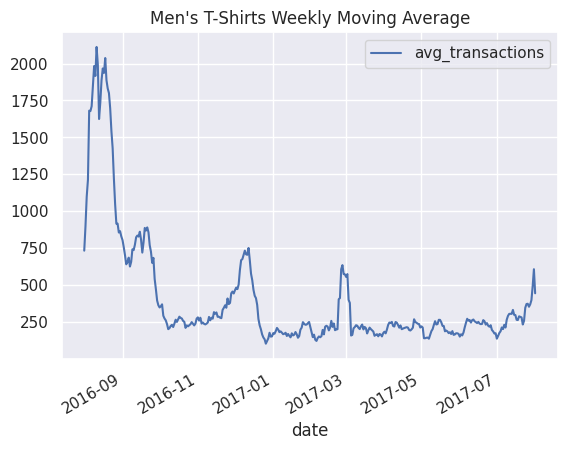

In [ ]:
result = client.query(query).result().to_dataframe()
result['date'] = pd.to_datetime(result['date'])
%matplotlib inline
result.plot(y='avg_transactions', x='date', kind='line', title='Men\'s T-Shirts Weekly Moving Average')

Looking at the chart above, it would seem there is some seasonality in the demand for Men's T-shirts.

Let's look at the moving averages for Office and Water Bottles and Tumblers as well and see if there is a similar trend.

In [ ]:
query = """
        WITH daily_drinkware_transactions AS
        (
        SELECT
            date,
            SUM(totals.transactions) AS transactions
        FROM
            `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
                 UNNEST(hits) AS hits,
                 UNNEST(hits.product) AS product
        WHERE
            _TABLE_SUFFIX BETWEEN '20160801' AND '20170801'
            AND
            product.v2ProductCategory = "Home/Drinkware/Water Bottles and Tumblers/"
        GROUP BY date
        ORDER BY date
        )
        SELECT
            date,
            AVG(transactions)
            OVER (
                  ORDER BY date
                  ROWS BETWEEN CURRENT ROW AND 7 FOLLOWING
                 ) AS avg_transactions
        FROM
            daily_drinkware_transactions
        """

<Axes: title={'center': 'Drinkware Weekly Moving Average'}, xlabel='date'>

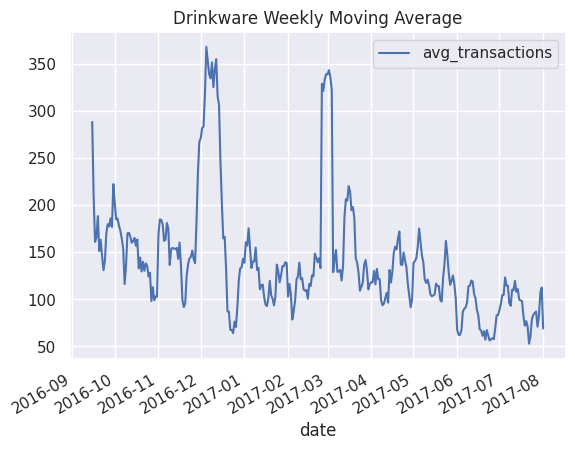

In [ ]:
result = client.query(query).result().to_dataframe()
result['date'] = pd.to_datetime(result['date'])
result.plot(y='avg_transactions', x='date', kind='line', title='Drinkware Weekly Moving Average')

In [ ]:
query = """
        WITH daily_electronics_transactions AS
        (
        SELECT
            date,
            SUM(totals.transactions) AS transactions
        FROM
            `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
                 UNNEST(hits) AS hits,
                 UNNEST(hits.product) AS product
        WHERE
            _TABLE_SUFFIX BETWEEN '20160801' AND '20170801'
            AND
            product.v2ProductCategory = "Home/Electronics/"
        GROUP BY date
        ORDER BY date
        )
        SELECT
            date,
            AVG(transactions)
            OVER (
                  ORDER BY date
                  ROWS BETWEEN CURRENT ROW AND 7 FOLLOWING
                 ) AS avg_transactions
        FROM
            daily_electronics_transactions
        """

<Axes: title={'center': 'Electronics Weekly Moving Average'}, xlabel='date'>

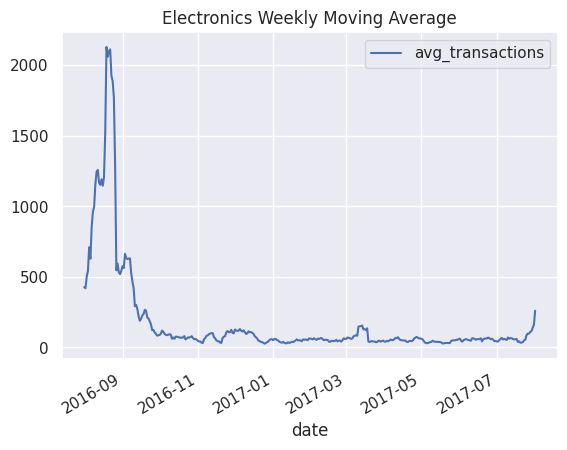

In [ ]:
result = client.query(query).result().to_dataframe()
result['date'] = pd.to_datetime(result['date'])
result.plot(y='avg_transactions', x='date', kind='line', title='Electronics Weekly Moving Average')

In [ ]:
query = """
        WITH daily_office_transactions AS
        (
        SELECT
            date,
            SUM(totals.transactions) AS transactions
        FROM
            `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
                 UNNEST(hits) AS hits,
                 UNNEST(hits.product) AS product
        WHERE
            _TABLE_SUFFIX BETWEEN '20160801' AND '20170801'
            AND
            product.v2ProductCategory = "Home/Office/"
        GROUP BY date
        ORDER BY date
        )
        SELECT
            date,
            AVG(transactions)
            OVER (
                  ORDER BY date
                   ROWS BETWEEN CURRENT ROW AND 7 FOLLOWING
                 ) AS avg_transactions
        FROM
           daily_office_transactions
        """

<Axes: title={'center': 'Office Weekly Moving Average'}, xlabel='date'>

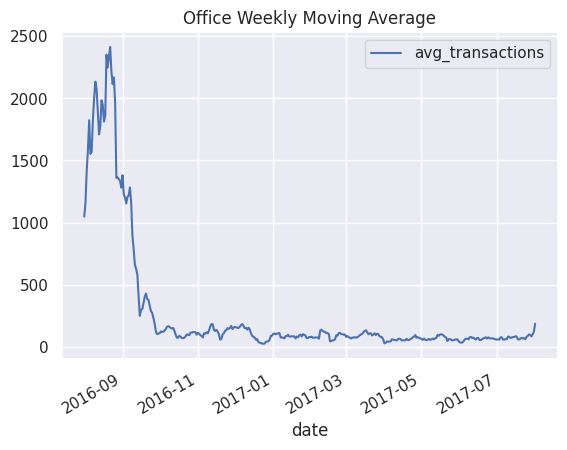

In [ ]:
result = client.query(query).result().to_dataframe()
result['date'] = pd.to_datetime(result['date'])
result.plot(y='avg_transactions', x='date', kind='line', title='Office Weekly Moving Average')

The average transactions for August 2016 are very high compared to later periods, but since we don't know the cause of this we will ignore it for now.

Office and Electronics products seem to have steady demand year-round, Drinkware seems to see a spike in demand in December and March, and demand for Men's T-Shirts seem to increase in September, March, and August.

# Visualize Insights and Interpret Results

Most Popular Landing Pages and Bounce Rates
The following are the most visited landing pages and their respective bounce rates

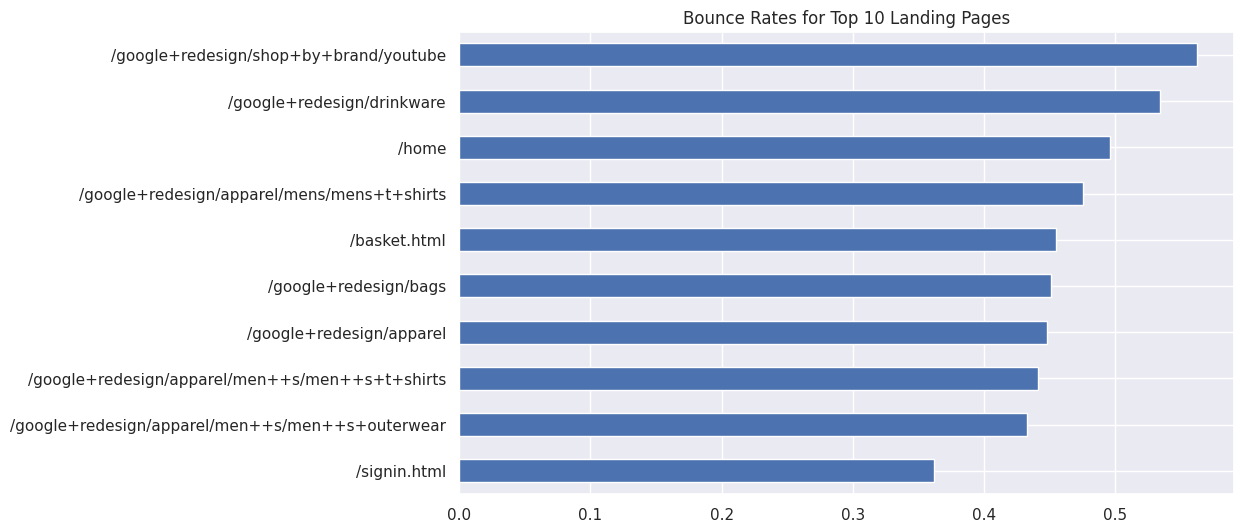

In [ ]:
query = """
        SELECT
            hits.page.pagePath AS landing_page,
            COUNT(*) AS views,
            SUM(totals.bounces)/COUNT(*) AS bounce_rate
        FROM
            `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
                 UNNEST(hits) AS hits
        WHERE
            _TABLE_SUFFIX BETWEEN '20160801' AND '20170801'
            AND
            hits.type='PAGE'
            AND
            hits.hitNumber=1
        GROUP BY landing_page
        ORDER BY views DESC
        LIMIT 10
        """

result = client.query(query).result().to_dataframe()
result.sort_values(by='bounce_rate',ascending=True, inplace=True)
fig, ax = plt.subplots(figsize=(10,6))
result.plot(y=['bounce_rate'], x='landing_page', kind='barh', legend=False, title='Bounce Rates for Top 10 Landing Pages', ax=ax)
ax.set_ylabel('')
plt.show()

From this I have formulated the following hypotheses:

- The reason that YouTube is the second most visited landing page and yet has the highest bounce rate is that there are a large number of visitors looking for YouTuber merchandise, and not YouTube brand merchandise.
- The reason for login and Basket's high visits and low bounce rate is due to a large number of repeat visitors.
- Within the top 10 landing pages 3 are related to Men's Apparel, indicating it is an especially popular category

# Browser and Device

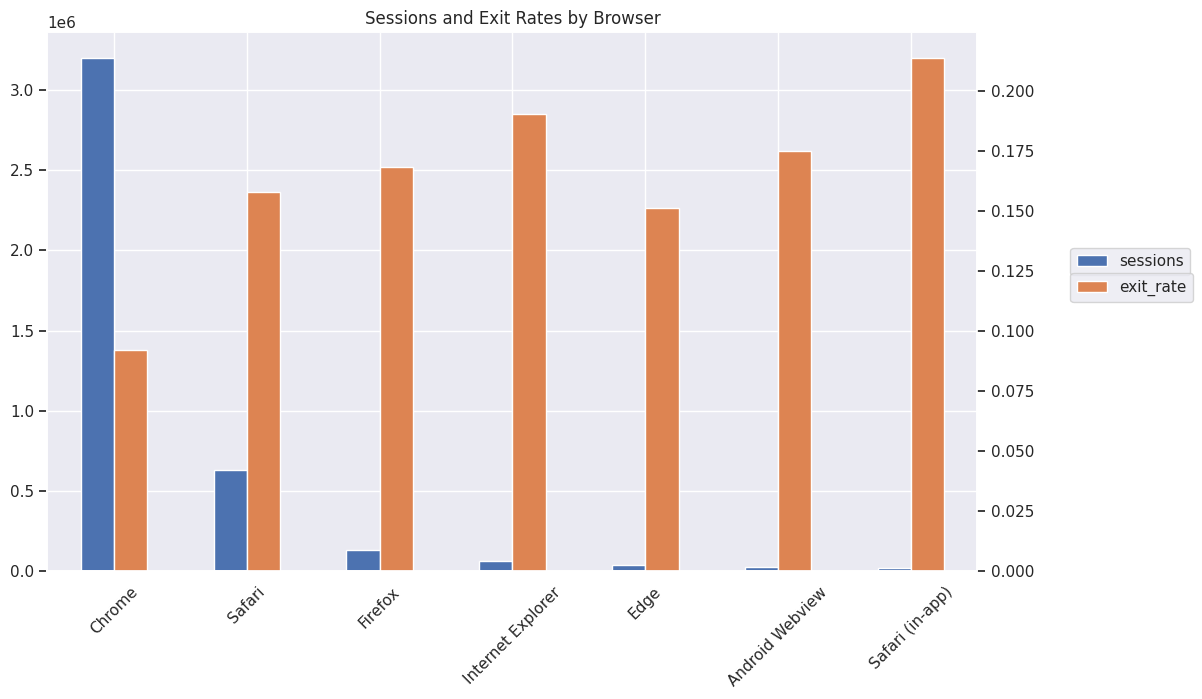

In [ ]:
query = """
        SELECT
            device.Browser AS browser,
            COUNT(*) AS sessions,
            SUM(totals.bounces)/COUNT(*) AS exit_rate
        FROM
            `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
                 UNNEST(hits) AS hits
        WHERE
            _TABLE_SUFFIX BETWEEN '20160801' AND '20170801'
        GROUP BY browser
        ORDER BY sessions DESC
        LIMIT 7
        """

result = client.query(query).result().to_dataframe()
fig, ax = plt.subplots(figsize=(12,7))
result.plot(y=['sessions', 'exit_rate'], x='browser', kind='bar', secondary_y='exit_rate', ax=ax, mark_right=False, title='Sessions and Exit Rates by Browser')
# sns.barplot(data=result, x='browser', y='sessions')
# sns.barplot(data=result, x='browser', y='exit_rate')
ax.set_xticklabels(labels=result['browser'], rotation=45)
ax.set_xlabel('')
ax.legend(loc=(1.1, 0.55))
plt.legend(loc=(1.1, 0.5))

plt.show()

The majority of sessions are from Chrome, but there are a significant number of sessions from Safari and Firefox as well.

The exit rate for Safari and Firefox is significantly higher than Chrome, which could indicate compatibility issues.

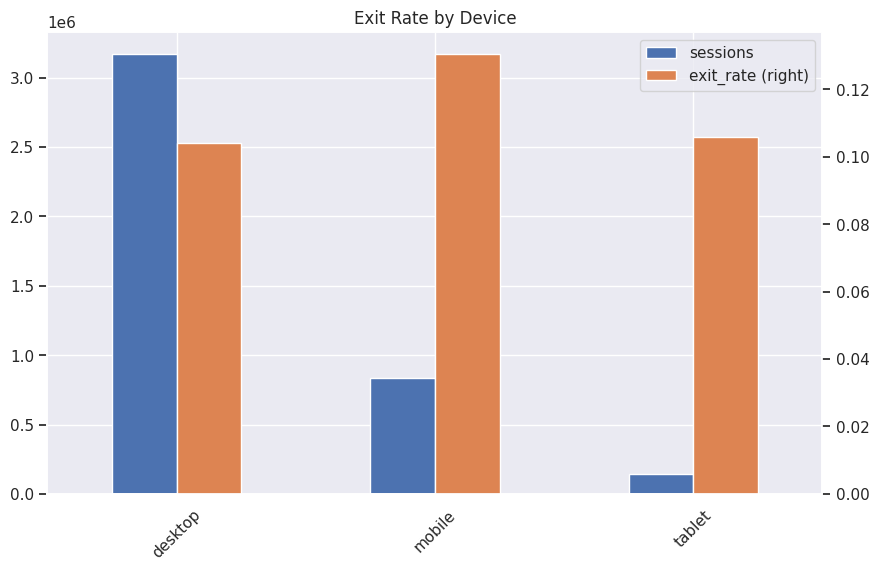

In [ ]:
query = """
        SELECT
            device.deviceCategory AS device,
            COUNT(*) AS sessions,
            SUM(totals.bounces)/COUNT(*) AS exit_rate
        FROM
            `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
                 UNNEST(hits) AS hits
        WHERE
            _TABLE_SUFFIX BETWEEN '20160801' AND '20170801'
        GROUP BY device
        ORDER BY sessions DESC
        """

result = client.query(query).result().to_dataframe()
fig, ax = plt.subplots(figsize=(10,6))
result.plot(y=['sessions','exit_rate'], x='device', kind='bar', title='Exit Rate by Device', secondary_y='exit_rate', ax=ax)
ax.set_xlabel('')
ax.set_xticklabels(labels=result['device'], rotation=45)
plt.show()

Here we see that the majority of sessions are on desktop, with a significant number also coming from mobile.

We can also see the roughly 2.5% greater exit rate of mobile compared to desktop and tablet. This is likely due to:

The site not being optimized for mobile devices
Users first browsing product pages on their mobile devices, and then later returning on desktop to complete their purchase
It may therefore be useful to conduct a user test for mobile devices. With this we can understand where users may face problems not just on a browser and device level, but on a page, form, and even button level.

# Type and Quality of Traffic

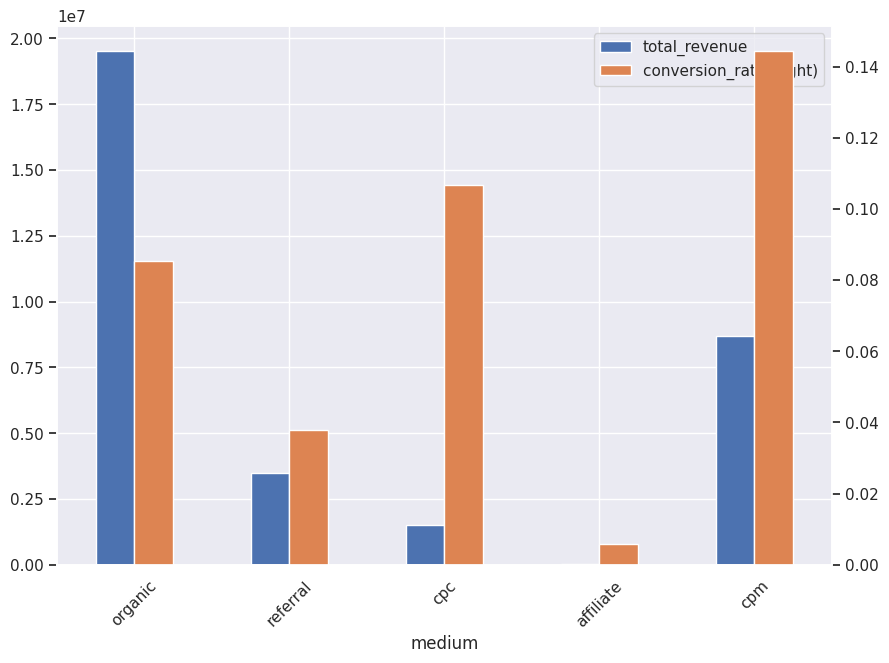

In [ ]:
query = """
        SELECT
            trafficSource.medium AS medium,
            COUNT(*) AS sessions,
            SUM(totals.bounces)/COUNT(*) AS exit_rate,
            SUM(totals.transactions) AS transactions,
            SUM(totals.totalTransactionRevenue)/1000000 AS total_revenue,
            SUM(totals.transactions)/COUNT(*) AS conversion_rate
        FROM
            `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
                 UNNEST(hits) AS hits
        WHERE
            _TABLE_SUFFIX BETWEEN '20160801' AND '20170801'
        GROUP BY medium
        ORDER BY sessions DESC
        LIMIT 10
        """

result = client.query(query).result().to_dataframe()
result = result.drop([0,6])
fig, ax = plt.subplots(figsize=(10,7))
result.plot(y=['total_revenue', 'conversion_rate'], x='medium', kind='bar', secondary_y='conversion_rate', ax=ax)
ax.set_xticklabels(labels=result['medium'], rotation=45)
plt.show()

Most of our traffic is organic, followed by CPM, referral, and CPC.

However, our paid advertising sources, CPM and CPC, have a noticeably higher conversion rate in comparison to the other sources.

# Conversion Path

In [ ]:
fig.show()

We can see that many visitors are proceeding through the conversion process up to checkout, but then exiting before completing their purchase. This leads me to think that either:

There is a problem with the purchase form
My earlier hypothesis that users are browsing and tentatively deciding on the purchase, and then completing it in a later session, may be correct

# Identify Best-Selling Product Categories and Forecast Demand

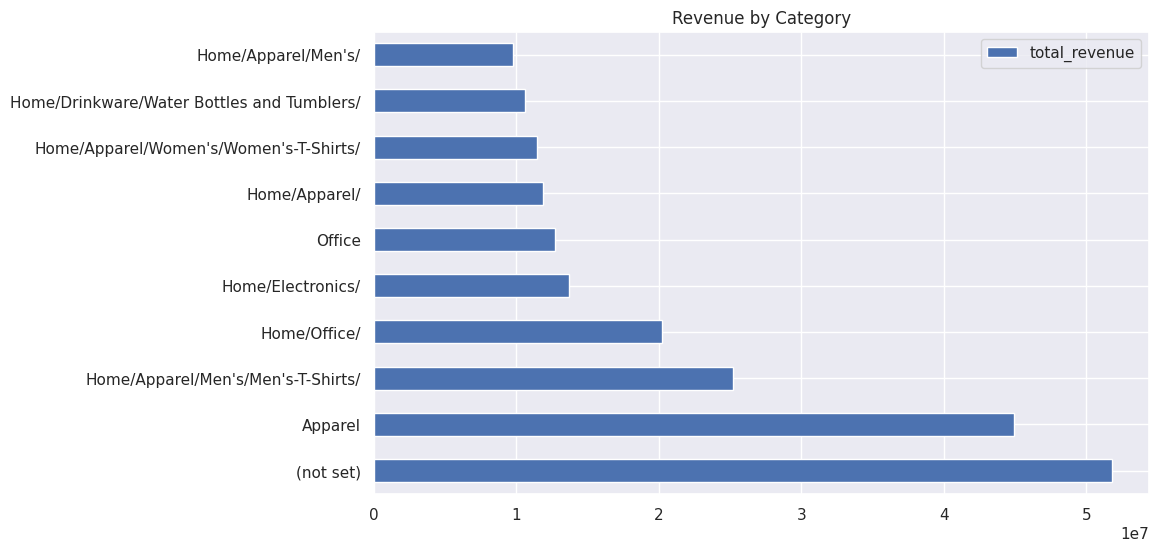

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
cat_result.plot(y='total_revenue', x='category', kind='barh', title='Revenue by Category', ax=ax)
ax.set_ylabel('')
plt.show()

The best-selling categories are Apparel、Office、Electronics、Office、and Drinkware.

Within the Apparel category, Men's T-Shirts seems to sell especially well.

Let's look at the moving average of transactions for Men's T-shirts、Drinkware、Office、and Electronics to see if their is any seasonal demand.

<Axes: title={'center': 'Electronics Weekly Moving Average'}, xlabel='date'>

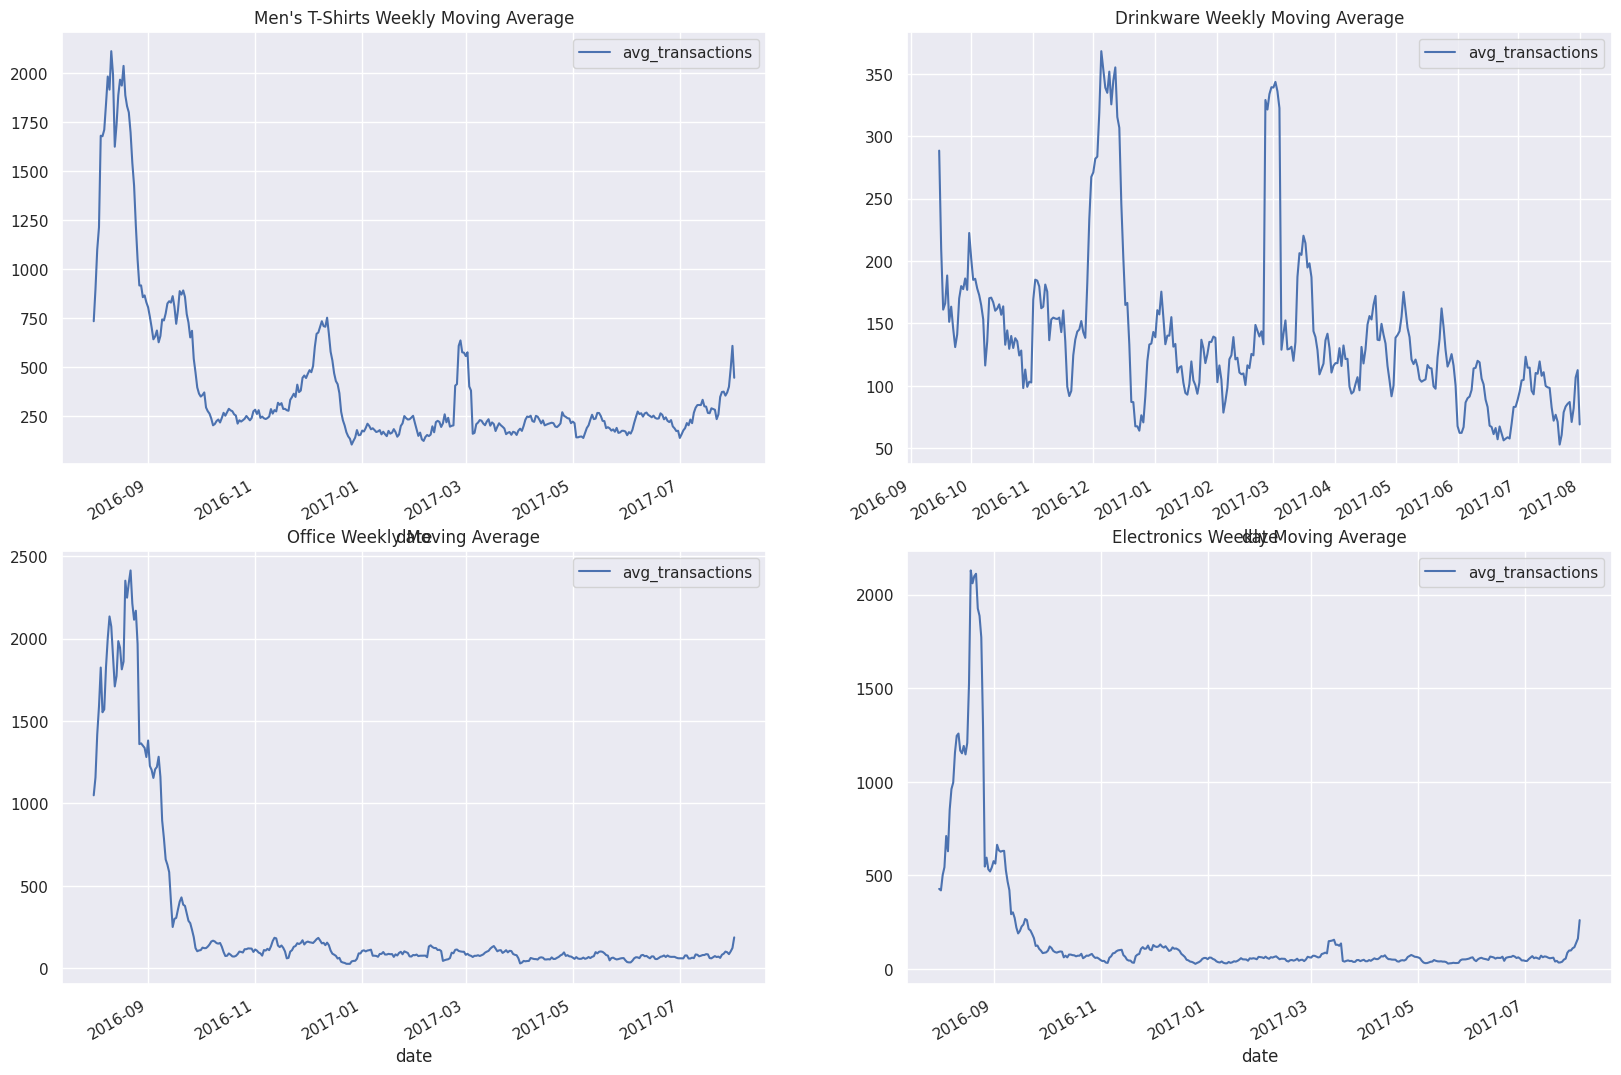

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,14))

# Men's T-shirts
query1 = """
        WITH daily_mens_tshirt_transactions AS
        (
        SELECT
            date,
            SUM(totals.transactions) AS transactions
        FROM
            `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
                 UNNEST(hits) AS hits,
                 UNNEST(hits.product) AS product
        WHERE
            _TABLE_SUFFIX BETWEEN '20160801' AND '20170801'
            AND
            product.v2ProductCategory = "Home/Apparel/Men's/Men's-T-Shirts/"
        GROUP BY date
        ORDER BY date
        )
        SELECT
            date,
            AVG(transactions)
            OVER (
                  ORDER BY date
                  ROWS BETWEEN CURRENT ROW AND 7 FOLLOWING
                 ) AS avg_transactions
        FROM
            daily_mens_tshirt_transactions
        """

result1 = client.query(query1).result().to_dataframe()
result1['date'] = pd.to_datetime(result1['date'])
ax1 = result1.plot(y='avg_transactions', x='date', kind='line', title='Men\'s T-Shirts Weekly Moving Average', ax=axes[0,0])

# Drinkware
query2 = """
        WITH daily_drinkware_transactions AS
        (
        SELECT
            date,
            SUM(totals.transactions) AS transactions
        FROM
            `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
                 UNNEST(hits) AS hits,
                 UNNEST(hits.product) AS product
        WHERE
            _TABLE_SUFFIX BETWEEN '20160801' AND '20170801'
            AND
            product.v2ProductCategory = "Home/Drinkware/Water Bottles and Tumblers/"
        GROUP BY date
        ORDER BY date
        )
        SELECT
            date,
            AVG(transactions)
            OVER (
                  ORDER BY date
                  ROWS BETWEEN CURRENT ROW AND 7 FOLLOWING
                 ) AS avg_transactions
        FROM
            daily_drinkware_transactions
        """

result2 = client.query(query2).result().to_dataframe()
result2['date'] = pd.to_datetime(result2['date'])
result2.plot(y='avg_transactions', x='date', kind='line', title='Drinkware Weekly Moving Average', ax=axes[0,1])

# Office Supplies
query3 = """
        WITH daily_office_transactions AS
        (
        SELECT
            date,
            SUM(totals.transactions) AS transactions
        FROM
            `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
                 UNNEST(hits) AS hits,
                 UNNEST(hits.product) AS product
        WHERE
            _TABLE_SUFFIX BETWEEN '20160801' AND '20170801'
            AND
            product.v2ProductCategory = "Home/Office/"
        GROUP BY date
        ORDER BY date
        )
        SELECT
            date,
            AVG(transactions)
            OVER (
                  ORDER BY date
                  ROWS BETWEEN CURRENT ROW AND 7 FOLLOWING
                 ) AS avg_transactions
        FROM
            daily_office_transactions
        """

result3 = client.query(query3).result().to_dataframe()
result3['date'] = pd.to_datetime(result3['date'])
result3.plot(y='avg_transactions', x='date', kind='line', title='Office Weekly Moving Average', ax=axes[1,0])

# Electronics
query4 = """
        WITH daily_electronics_transactions AS
        (
        SELECT
            date,
            SUM(totals.transactions) AS transactions
        FROM
            `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
                 UNNEST(hits) AS hits,
                 UNNEST(hits.product) AS product
        WHERE
            _TABLE_SUFFIX BETWEEN '20160801' AND '20170801'
            AND
            product.v2ProductCategory = "Home/Electronics/"
        GROUP BY date
        ORDER BY date
        )
        SELECT
            date,
            AVG(transactions)
            OVER (
                  ORDER BY date
                  ROWS BETWEEN CURRENT ROW AND 7 FOLLOWING
                 ) AS avg_transactions
        FROM
            daily_electronics_transactions
        """

result4 = client.query(query4).result().to_dataframe()
result4['date'] = pd.to_datetime(result4['date'])
result4.plot(y='avg_transactions', x='date', kind='line', title='Electronics Weekly Moving Average', ax=axes[1,1])

The average transactions for August 2016 are very high compared to later periods, but since we don't know the cause of this we will ignore it for now.

Office and Electronics products seem to have steady demand year-round, Drinkware seems to see a spike in demand in December and March, and demand for Men's T-Shirts seem to increase in September, March, and August.

Based on this, we should consider analyzing the effect on sales of increased advertising during these periods.

- Is our site optimized for SEO, and are people seeing what they expect when they first enter the site?
- Among the top 5 most widely-used browsers, is our site being displayed the same on each, and does it have the same functionality on each?
- Is our site being displayed and functioning properly on mobile devices?
- Are users exiting the site on the checkout page because of a problem with the page/form, or do many of our users complete their purchases across multiple sessions?
- Since we now know that 2 of our best product categories have significant seasonal demand, and that traffic from paid advetising has the highest conversion rates, can we adjust the timing and content of our advertising campaigns to capitalize on this seasonal demand, and significantly improve sales?

In [ ]:
year_query = """
SELECT substr(date,0,4) Year,
        COUNT(*) Visits
        FROM
            `bigquery-public-data.google_analytics_sample.*`
GROUP BY Year
"""
year_result = client.query(year_query).to_dataframe()
year_result

,Year,Visits
0,2017,467260
1,2016,436393


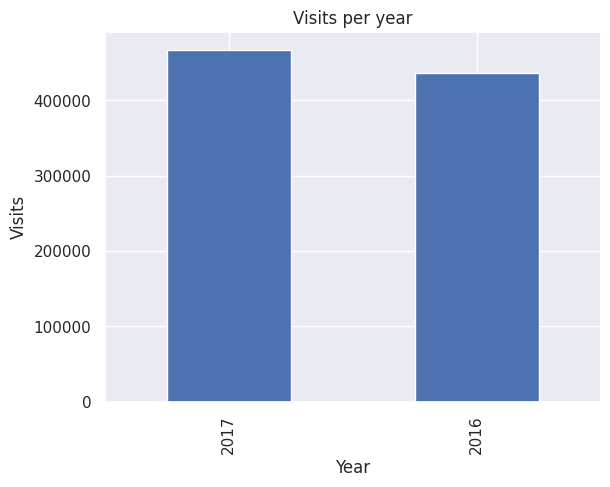

In [ ]:
#The bar plot plot
year_graph = year_result.plot(kind='bar',x='Year',y='Visits')
#Title
year_graph.set_title('Visits per year')
#Removing the legend because does not add any important information
year_graph.legend().remove()
#Set the y and x axis labels
year_graph.set_ylabel('Visits')
year_graph.set_xlabel('Year')
plt.show()

In [ ]:
month_query = """
SELECT CONCAT(substr(date,0,4),'-', substr(date,5,2)) Month,
        COUNT(*) Visits
        FROM
            `bigquery-public-data.google_analytics_sample.*`
GROUP BY Month
ORDER BY Month
"""
month_result = client.query(month_query).to_dataframe()
month_result

,Month,Visits
0,2016-08,74759
1,2016-09,71032
2,2016-10,97506
3,2016-11,113972
4,2016-12,79124
5,2017-01,64694
6,2017-02,62192
7,2017-03,69931
8,2017-04,67126
9,2017-05,65371


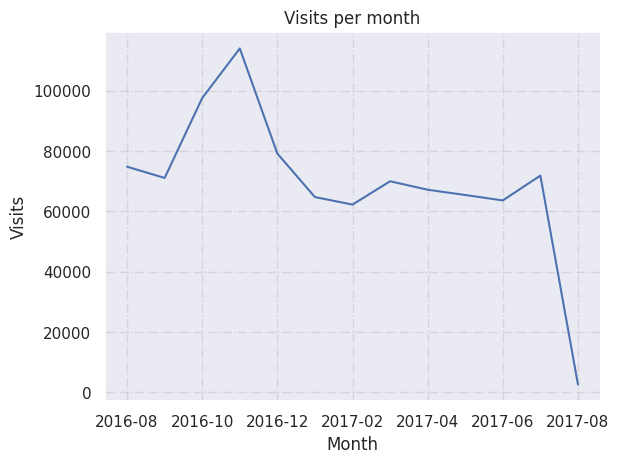

In [ ]:
month_graph = month_result.plot(kind='line',x='Month',y='Visits')
month_graph.set_title('Visits per month')
month_graph.legend().remove()
month_graph.set_ylabel('Visits')
month_graph.set_xlabel('Month')
#Adding a grid in the plot for improve the visualization
month_graph.xaxis.grid(True, linestyle='-.', which='major', color='grey', alpha=.2)
month_graph.yaxis.grid(True, linestyle='-.', which='major', color='grey', alpha=.2)
plt.show()

In [ ]:
zone_query = """
SELECT geoNetwork.continent Area,
        COUNT(*) Visits
        FROM
            `bigquery-public-data.google_analytics_sample.*`
GROUP BY Area
ORDER BY Visits
"""
zone_result = client.query(zone_query).to_dataframe()
zone_result

,Area,Visits
0,(not set),1468
1,Africa,14745
2,Oceania,15054
3,Europe,198311
4,Asia,223698
5,Americas,450377


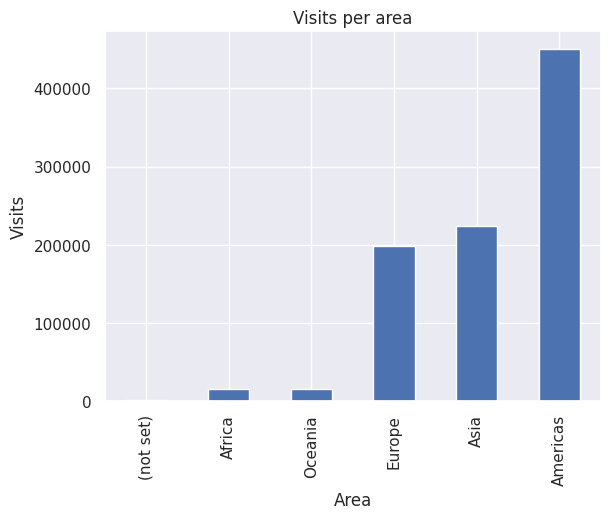

In [ ]:
zone_graph = zone_result.plot(kind='bar',x='Area',y='Visits')
zone_graph.set_title('Visits per area')
zone_graph.legend().remove()
zone_graph.set_ylabel('Visits')
zone_graph.set_xlabel('Area')
plt.show()

In [ ]:
query = '''
    SELECT
        FORMAT("%'d",COUNT(DISTINCT fullVisitorId)) AS users,
        FORMAT("%'d",SUM(totals.visits)) AS visits,
        FORMAT("%'d",SUM(totals.pageviews)) AS pageviews,
        FORMAT("%'d", SUM(totals.transactions)) AS transactions,
        SUM(totals.transactionRevenue)/1000000 AS revenue

    FROM
        `bigquery-public-data.google_analytics_sample.ga_sessions_*`
    WHERE
        _TABLE_SUFFIX BETWEEN '20161001' AND '20161230'
        AND totals.totalTransactionRevenue IS NOT NULL
'''

safe_query_job = client.query(query)
high_level_aug = safe_query_job.to_dataframe()

high_level_aug.head()

,users,visits,pageviews,transactions,revenue
0,"2,868","3,176","92,822","3,314",386199.7


Inference :
During 2016Q4, the Google merchendise store had over 3000 visits, almost 93,000 pageviews and earned $ 386,200 in revenue.

In [ ]:
query = """
    SELECT
        DATE_TRUNC(PARSE_DATE('%Y%m%d',date), MONTH) AS month,
        SUM(totals.visits) AS visits,
        SUM(totals.transactionRevenue)/1000000 AS revenue

    FROM
        `bigquery-public-data.google_analytics_sample.ga_sessions_*`
    WHERE
        _TABLE_SUFFIX BETWEEN '20161001' AND '20161230'
        AND totals.totalTransactionRevenue IS NOT NULL
    GROUP BY 1
    ORDER BY 1

"""
safe_query_job = client.query(query)
df1 = safe_query_job.to_dataframe()
df1.head()

,month,visits,revenue
0,2016-10-01,872,113329.07
1,2016-11-01,919,119013.87
2,2016-12-01,1385,153856.76


Inference:
December generated over $ 153,000 in revenue and garned almost 1400 visits to the Google Merchandise store. The revenue generated in Dec accounted for 40% of Q4 sales, indicating a holiday surge that is typically seen in retail.

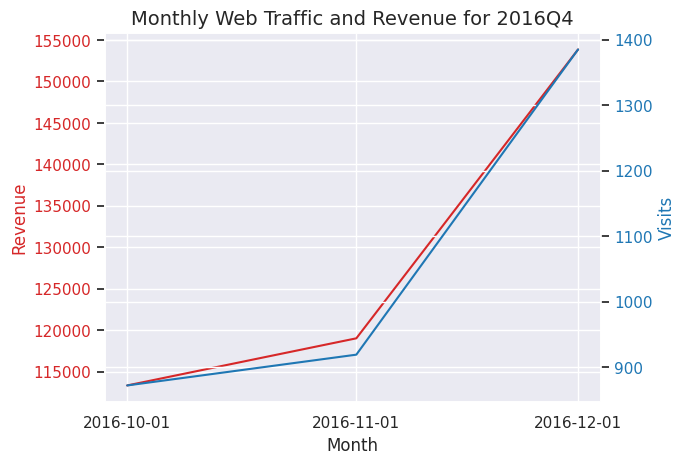

In [ ]:
fig,ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Month')
ax1.set_ylabel('Revenue', color=color)
ax1.plot(df1['month'], df1['revenue'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Visits', color=color)  # we already handled the x-label with ax1
ax2.plot(df1['month'], df1['visits'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Monthly Web Traffic and Revenue for 2016Q4', fontsize=14)
plt.xticks(df1['month'],rotation=45)
plt.show()

In [ ]:
# create table with revenue by country
# traffic by month
query = """
    SELECT
        geoNetwork.country AS country,
        SUM(totals.transactionRevenue)/1000000 AS revenue

    FROM
        `bigquery-public-data.google_analytics_sample.ga_sessions_*`
    WHERE
        _TABLE_SUFFIX BETWEEN '20161001' AND '20161230'
        AND totals.totalTransactionRevenue IS NOT NULL
    GROUP BY 1
    ORDER BY 2 desc

"""
safe_query_job = client.query(query)
df2 = safe_query_job.to_dataframe()
df2.head()

,country,revenue
0,United States,365518.96
1,Canada,9975.27
2,Kenya,3679.30
3,Puerto Rico,656.16
4,United Kingdom,527.10


In [ ]:
# create a heatmap of revenue by geo location
fig = go.Figure(data=go.Choropleth(
    locations=df2['country'],
    z = df2['revenue'].astype(float),
    locationmode = 'country names',
    colorscale = 'Reds',
    colorbar_title = "revenue USD",
))

fig.update_layout(
    title_text = '2016Q4 Google Merchandise Store by Geo Location',)
fig.show(renderer="colab")

# Second Dataset (Ecommerce Site)

In [ ]:
%cd /content/drive/MyDrive/Spacy_CV_PARSER_NER

/content/drive/MyDrive/Spacy_CV_PARSER_NER


After going through this dataset, the marketer inside me started looking for answers.

I wanted to find out –

What the five biggest sources of traffic were.
What the five sources that drove the most traffic in November 2019 were.
What the five biggest sources of revenue in 2020 were.

So I went looking for answers by visualizing data using Gigasheet as part of my website traffic analysis.

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Spacy_CV_PARSER_NER/Web Analytic_Dataset.csv")

In [ ]:
df

,Source / Medium,Year,Month of the year,Users,New Users,Sessions,Bounce Rate,Pageviews,Avg. Session Duration,Conversion Rate (%),Transactions,Revenue,Quantity Sold
0,A,2019,11,"126,870","104,020","194,667",71.59%,"455,159",00:01:11,0.2,394,"83,244",482
1,A,2020,5,"120,625","98,574","194,114",64.56%,"559,509",00:01:32,0.69,"1,347","203,552","2,402"
2,A,2019,10,"123,361","104,308","181,175",41.91%,"368,907",00:01:05,0.26,477,"94,282",599
3,A,2019,9,"106,551","88,428","170,329",75.92%,"368,803",00:01:01,0.18,311,"54,971",415
4,A,2020,6,"102,123","82,461","163,446",67.10%,"425,410",00:01:20,0.7,"1,138","167,113","1,987"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,AA,2020,5,111,97,131,61.07%,324,00:01:26,0,0,0,0
246,K,2020,2,112,81,130,68.46%,297,00:01:20,0,0,0,0
247,JJ,2019,12,117,90,129,29.46%,"1,000",00:05:36,0.78,1,81,1
248,K,2020,3,111,70,127,62.20%,397,00:01:27,0.79,1,77,1


# 1. What were the five biggest sources of traffic?

If you got the chance to look at the dataset, you might have noticed that the eCommerce store is attracting traffic from different sources. We have hands on information like what traffic sources helped attract how many users every month in 2019 and 2020. We also have access to other similar metrics, but more on that later.

I wanted to determine the five biggest traffic sources for the eCommerce store. To find out, first, I grouped by the column group “Source/Medium.”

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Source / Medium        250 non-null    object
 1   Year                   250 non-null    int64 
 2   Month of the year      250 non-null    int64 
 3   Users                  250 non-null    object
 4   New Users              250 non-null    object
 5   Sessions               250 non-null    object
 6   Bounce Rate            250 non-null    object
 7   Pageviews              250 non-null    object
 8   Avg. Session Duration  250 non-null    object
 9   Conversion Rate (%)    250 non-null    object
 10  Transactions           250 non-null    object
 11  Revenue                250 non-null    object
 12  Quantity Sold          250 non-null    object
dtypes: int64(2), object(11)
memory usage: 25.5+ KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Source / Medium        250 non-null    object
 1   Year                   250 non-null    int64 
 2   Month of the year      250 non-null    int64 
 3   Users                  250 non-null    object
 4   New Users              250 non-null    object
 5   Sessions               250 non-null    object
 6   Bounce Rate            250 non-null    object
 7   Pageviews              250 non-null    object
 8   Avg. Session Duration  250 non-null    object
 9   Conversion Rate (%)    250 non-null    object
 10  Transactions           250 non-null    object
 11  Revenue                250 non-null    object
 12  Quantity Sold          250 non-null    object
dtypes: int64(2), object(11)
memory usage: 25.5+ KB


In [ ]:
'Source / Medium'

'Source / Medium'

In [ ]:
df

,Source / Medium,Year,Month of the year,Users,New Users,Sessions,Bounce Rate,Pageviews,Avg. Session Duration,Conversion Rate (%),Transactions,Revenue,Quantity Sold
0,A,2019,11,"126,870","104,020","194,667",71.59%,"455,159",00:01:11,0.2,394,"83,244",482
1,A,2020,5,"120,625","98,574","194,114",64.56%,"559,509",00:01:32,0.69,"1,347","203,552","2,402"
2,A,2019,10,"123,361","104,308","181,175",41.91%,"368,907",00:01:05,0.26,477,"94,282",599
3,A,2019,9,"106,551","88,428","170,329",75.92%,"368,803",00:01:01,0.18,311,"54,971",415
4,A,2020,6,"102,123","82,461","163,446",67.10%,"425,410",00:01:20,0.7,"1,138","167,113","1,987"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,AA,2020,5,111,97,131,61.07%,324,00:01:26,0,0,0,0
246,K,2020,2,112,81,130,68.46%,297,00:01:20,0,0,0,0
247,JJ,2019,12,117,90,129,29.46%,"1,000",00:05:36,0.78,1,81,1
248,K,2020,3,111,70,127,62.20%,397,00:01:27,0.79,1,77,1


In [ ]:
df[['Users', 'Revenue', 'Pageviews','Transactions','Sessions','New Users']] = df[['Users', 'Revenue', 'Pageviews','Transactions','Sessions','New Users']].replace(',','',regex=True).astype(str).astype(int)

In [ ]:
df['Users'] = df['Users'].astype(str).astype(int)

In [ ]:
df['Revenue'] = df['Revenue'].str.replace(",", "")

In [ ]:
df['Revenue'] = df['Revenue'].astype(str).astype(int)

In [ ]:
df['Pageviews'] = df['Pageviews'].str.replace(",", "")
df['Transactions'] = df['Transactions'].str.replace(",", "")

In [ ]:
df['Sessions'] = df['Sessions'].str.replace(",", "")
df['Sessions'] = df['Sessions'].astype(str).astype(int)

In [ ]:
df['New Users'] = df['New Users'].str.replace(",", "")
df['New Users'] = df['New Users'].astype(str).astype(int)

In [ ]:
df['Pageviews'] = df['Pageviews'].astype(str).astype(int)
df['Transactions'] = df['Transactions'].astype(str).astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Source / Medium        250 non-null    object
 1   Year                   250 non-null    int64 
 2   Month of the year      250 non-null    int64 
 3   Users                  250 non-null    int64 
 4   New Users              250 non-null    int64 
 5   Sessions               250 non-null    int64 
 6   Bounce Rate            250 non-null    object
 7   Pageviews              250 non-null    int64 
 8   Avg. Session Duration  250 non-null    object
 9   Conversion Rate (%)    250 non-null    object
 10  Transactions           250 non-null    int64 
 11  Revenue                250 non-null    int64 
 12  Quantity Sold          250 non-null    object
dtypes: int64(8), object(5)
memory usage: 25.5+ KB


In [ ]:
df1_u = df.groupby(['Source / Medium'])['Users'].sum().to_frame(name = 'count').reset_index()

In [ ]:
df1_u

,Source / Medium,count
0,A,1110513
1,AA,2697
2,B,696901
3,BB,382
4,C,255043
5,CC,1333
6,D,107241
7,DD,320
8,E,185065
9,EE,620


In [ ]:
import plotly.express as px
# This dataframe has 244 lines, but 4 distinct values for `day`
fig = px.pie(df1_u, values='count', names='Source / Medium')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Judging by the data, the top five traffic sources were A, B, C, E, and F.

You can also perform the same operation for two different column groups; let’s say we do it here for users and new users.

In [ ]:
import plotly.express as px
fig = px.bar(df1_u, x='Source / Medium', y='count')
fig.show()

Awesomeness overloaded!

You can also apply the 2019 filter prior to grouping the data to visualize this data on a yearly basis. Or you can group data by first the year, then months, and finally by source to gain an understanding of the data on a monthly level.  

Let me show you how.

# 2. What were the five sources that drove the most traffic in November 2019?

In [ ]:
df_year = df.groupby(['Year','Month of the year','Source / Medium'])['Users'].sum().to_frame(name = 'total').reset_index()

In [ ]:
df_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               250 non-null    int64 
 1   Month of the year  250 non-null    int64 
 2   Source / Medium    250 non-null    object
 3   total              250 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.9+ KB


In [ ]:
import plotly.express as px
# This dataframe has 244 lines, but 4 distinct values for `day`
fig = px.pie(df_year[df_year['Month of the year'] == 9], values='total', names='Source / Medium',title='Traffic in September 2019')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Judging by the data, the top five traffic sources in September 2019 were A, B, E, H, and I.

In [ ]:
fig = px.bar(df_year[df_year['Month of the year'] == 9], x='total', y='Source / Medium',title='Traffic in September 2019')
fig.show()

In [ ]:
import plotly.express as px
# This dataframe has 244 lines, but 4 distinct values for `day`
fig = px.pie(df_year[df_year['Month of the year'] == 10], values='total', names='Source / Medium',title='Traffic in October 2019')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [ ]:
fig = px.bar(df_year[df_year['Month of the year'] == 9], x='total', y='Source / Medium',title='Traffic in October 2019')
fig.show()

- Judging by the data, the top five traffic sources in October 2019 were A, B, E H,and I.
- On comparision between the two month (Nov vs Oct) October has higher traffic rate source from (A,B,I)


In [ ]:
import plotly.express as px
# This dataframe has 244 lines, but 4 distinct values for `day`
fig = px.pie(df_year[df_year['Month of the year'] == 11], values='total', names='Source / Medium',title='Traffic in November 2019')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [ ]:
fig = px.bar(df_year[df_year['Month of the year'] == 9], x='total', y='Source / Medium',title='Traffic in November 2019')
fig.show()

In [ ]:
import plotly.express as px
# This dataframe has 244 lines, but 4 distinct values for `day`
fig = px.bar(df_year[df_year['Month of the year'] == 12], x='total', y='Source / Medium',title='Traffic in December 2019')
fig.show()

In [ ]:
fig = px.pie(df_year[df_year['Month of the year'] == 12], values='total', names='Source / Medium',title='Traffic in December 2019')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Judging by the data, the top five traffic sources in October 2019 were A, B, E H,and I.
On comparision between the four months (Sept, Nov, Oct, Dec) the month of DEC has highest source of traffic in 2019 are from A,B,E,H,I


# What were the five sources that drove the most traffic in year 2019 & 2020?

In [ ]:
df_year

,Year,Month of the year,Source / Medium,total
0,2019,9,A,106551
1,2019,9,AA,743
2,2019,9,B,40697
3,2019,9,BB,255
4,2019,9,C,2805
...,...,...,...,...
245,2020,8,M,807
246,2020,8,O,559
247,2020,8,P,1323
248,2020,8,T,703


In [ ]:
import plotly.express as px
# This dataframe has 244 lines, but 4 distinct values for `day`
fig = px.pie(df_year[df_year['Year'] == 2019], values='total', names='Source / Medium',title='Traffic in Year 2019')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [ ]:
fig = px.bar(df_year[df_year['Year'] == 2019], x='Source / Medium', y='total',title='Traffic in December 2019')
fig.show()

In [ ]:
import plotly.express as px
# This dataframe has 244 lines, but 4 distinct values for `day`
fig = px.pie(df_year[df_year['Year'] == 2020], values='total', names='Source / Medium',title='Traffic in Year 2020')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

- In 2019 highest source of traffic are from A,B,E,H,I
- In 2020 highest source of traffic are from A,B,C,F,D
From the analysis its derived that in 2020 there is increase in traffic from a,b compared to 2019 & there is change in traffic source such as C,F,D

# 3. What were the five biggest sources of revenue in 2020?

We want to find out what the five biggest sources of revenue were for the eCommerce store in 2020. So, here’s what I did to find out the answer.

First, I applied this filter to get my hands only on 2020 data.  

In [ ]:
df_revenue = df.groupby(['Source / Medium','Year'])['Revenue'].sum().to_frame(name = 'count_revenue').reset_index()

In [ ]:
df_revenue

,Source / Medium,Year,count_revenue
0,A,2019,335498
1,A,2020,958638
2,AA,2019,0
3,AA,2020,81
4,B,2019,191107
5,B,2020,349585
6,BB,2019,103
7,C,2019,5026
8,C,2020,202738
9,CC,2020,24440


In [ ]:
import plotly.express as px
fig = px.pie(df_revenue[df_revenue['Year'] == 2020], values='count_revenue', names='Source / Medium',title='Revenue in Year 2020')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [ ]:
import plotly.express as px
fig = px.pie(df_revenue[df_revenue['Year'] == 2019], values='count_revenue', names='Source / Medium',title='Revenue in Year 2019')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

- Top of source of revenue are from A,S,B,U,C in year 2020
- Top of source of revenue are from A,B,S,E,F in year 2019

# Customer Source Overview
- Total number of based on the Source/Medium of visit

In [ ]:
df1_un = df.groupby(['Source / Medium'])['New Users'].sum().to_frame(name = 'count_nu').reset_index()

In [ ]:
df1_un

,Source / Medium,count_nu
0,A,913890
1,AA,2399
2,B,598532
3,BB,9
4,C,202337
5,CC,823
6,D,104706
7,DD,209
8,E,27504
9,EE,62


In [ ]:
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Bar(
                    x=df1_u['Source / Medium'],
                    y=df1_u['count'],
                    name='Users',
                    marker_color='indianred'
                    ))
fig.add_trace(go.Bar(
                    x=df1_un['Source / Medium'],
                    y=df1_un['count_nu'],
                    name='New Users',
                    marker_color='blue'
                    ))
fig.update_layout(width = 1300 , height = 700 , title = "Total Users and New Users By Source/Medium BarChart")

In [ ]:
!pip install dash

In [ ]:
df

,Source / Medium,Year,Month of the year,Users,New Users,Sessions,Bounce Rate,Pageviews,Avg. Session Duration,Conversion Rate (%),Transactions,Revenue,Quantity Sold
0,A,2019,11,126870,"104,020","194,667",71.59%,455159,00:01:11,0.2,394,83244,482
1,A,2020,5,120625,"98,574","194,114",64.56%,559509,00:01:32,0.69,1347,203552,"2,402"
2,A,2019,10,123361,"104,308","181,175",41.91%,368907,00:01:05,0.26,477,94282,599
3,A,2019,9,106551,"88,428","170,329",75.92%,368803,00:01:01,0.18,311,54971,415
4,A,2020,6,102123,"82,461","163,446",67.10%,425410,00:01:20,0.7,1138,167113,"1,987"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,AA,2020,5,111,97,131,61.07%,324,00:01:26,0,0,0,0
246,K,2020,2,112,81,130,68.46%,297,00:01:20,0,0,0,0
247,JJ,2019,12,117,90,129,29.46%,1000,00:05:36,0.78,1,81,1
248,K,2020,3,111,70,127,62.20%,397,00:01:27,0.79,1,77,1


# Session

In [ ]:
df

,Source / Medium,Year,Month of the year,Users,New Users,Sessions,Bounce Rate,Pageviews,Avg. Session Duration,Conversion Rate (%),Transactions,Revenue,Quantity Sold
0,A,2019,11,126870,104020,194667,71.59%,455159,00:01:11,0.2,394,83244,482
1,A,2020,5,120625,98574,194114,64.56%,559509,00:01:32,0.69,1347,203552,"2,402"
2,A,2019,10,123361,104308,181175,41.91%,368907,00:01:05,0.26,477,94282,599
3,A,2019,9,106551,88428,170329,75.92%,368803,00:01:01,0.18,311,54971,415
4,A,2020,6,102123,82461,163446,67.10%,425410,00:01:20,0.7,1138,167113,"1,987"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,AA,2020,5,111,97,131,61.07%,324,00:01:26,0,0,0,0
246,K,2020,2,112,81,130,68.46%,297,00:01:20,0,0,0,0
247,JJ,2019,12,117,90,129,29.46%,1000,00:05:36,0.78,1,81,1
248,K,2020,3,111,70,127,62.20%,397,00:01:27,0.79,1,77,1


In [ ]:
df_customer_eng = df.groupby(['Year'])[['Users','Sessions','Pageviews','Transactions']].sum().reset_index()

In [ ]:
df_customer_eng

,Year,Users,Sessions,Pageviews,Transactions
0,2019,1049791,1529528,4111038,4659
1,2020,1774098,2493296,6916998,16604


In [ ]:
pageviews_per_session=df.groupby('Year').apply(lambda x: x['Pageviews'].sum() /
                                   x['Sessions'].sum())
df_customer_eng['pageviews_per_session'] = df_customer_eng['Year'].map(pageviews_per_session).round(2)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
                    x=df_customer_eng['Year'],
                    y=df_customer_eng['Users'],
                    name='Users',
                    marker_color='indianred'
                    ))
fig.add_trace(go.Bar(
                    x=df_customer_eng['Year'],
                    y=df_customer_eng['Pageviews'],
                    name='PageViews',
                    marker_color='lightsalmon'
                    ))
fig.add_trace(go.Bar(
                    x=df_customer_eng['Year'],
                    y=df_customer_eng['Sessions'],
                    name='Session',
                    marker_color='blue'
                    ))
fig.add_trace(go.Bar(
                    x=df_customer_eng['Year'],
                    y=df_customer_eng['Transactions'],
                    name='Transactions',
                    marker_color='red'
                    ))
fig.update_layout(width = 1300 , height = 700 , title = "Customer Engagement Stats By Year BarChart")

There are increase in the number of session , page view, users in 2020 respectively compared to 2019


In [ ]:
df_customer_eng

,Year,Users,Sessions,Pageviews,Transactions,pageviews_per_session
0,2019,1049791,1529528,4111038,4659,2.69
1,2020,1774098,2493296,6916998,16604,2.77


In [ ]:
fig1 = px.pie(df_customer_eng,
                        values=df_customer_eng['pageviews_per_session'],
                        names=df_customer_eng['Year']
                        )
fig1.update_traces(
                        textposition='inside',
                        textinfo='percent+label'
                        )
fig1.update_layout( width = 1100 , height = 500  , title = "Pageviews per Session By Year PieChart")

- Year 2020 have higher number of pageview persession compared to 2019

# To find the Total Transaction By Source

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Source / Medium        250 non-null    object
 1   Year                   250 non-null    int64 
 2   Month of the year      250 non-null    int64 
 3   Users                  250 non-null    int64 
 4   New Users              250 non-null    int64 
 5   Sessions               250 non-null    int64 
 6   Bounce Rate            250 non-null    object
 7   Pageviews              250 non-null    int64 
 8   Avg. Session Duration  250 non-null    object
 9   Conversion Rate (%)    250 non-null    object
 10  Transactions           250 non-null    int64 
 11  Revenue                250 non-null    int64 
 12  Quantity Sold          250 non-null    object
dtypes: int64(8), object(5)
memory usage: 25.5+ KB


In [ ]:
df_transaction = df.groupby(['Source / Medium','Year'])[['Transactions']].sum().reset_index()

In [ ]:
import plotly.express as px
fig = px.pie(df_transaction[df_transaction['Year'] == 2020], values='Transactions', names='Source / Medium',title='Transcation in Year 2020')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [ ]:
import plotly.express as px
fig = px.pie(df_transaction[df_transaction['Year'] == 2019], values='Transactions', names='Source / Medium',title='Transcation in Year 2019')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [ ]:
fig = px.bar(
                df_transaction,
                x='Source / Medium',
                y='Transactions',
                color='Source / Medium',
            )
fig.update_layout(width = 1300 , height = 700 , title = "Total Transactions By Source BarChart")

- A, B ,S,E,F have the highest source of transaction 2019
- A,S,B,C,U have the highest source of transaction 2020

# Conversion Rate By Source/Medium

In [ ]:
conversion_rate = df.groupby(['Source / Medium','Year']).apply(lambda x: x['Transactions'].sum() /
                                   x['Sessions'].sum())

In [ ]:
df_cr = conversion_rate.to_frame().reset_index()

In [ ]:
df_cr

,Source / Medium,Year,0
0,A,2019,0.002422
1,A,2020,0.005819
2,AA,2019,0.000000
3,AA,2020,0.000939
4,B,2019,0.002475
5,B,2020,0.003972
6,BB,2019,0.000883
7,C,2019,0.002372
8,C,2020,0.004644
9,CC,2020,0.062890


In [ ]:
fig = px.pie(df_cr[df_cr['Year'] == 2019], values=0, names='Source / Medium',title='Conversion Rate in Year 2019')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

- Highest conversion rate in year 2019 are from source S,U,EE

In [ ]:
fig = px.pie(df_cr[df_cr['Year'] == 2020], values=0, names='Source / Medium',title='Conversion Rate in Year 2020')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

# Analyse pageview, Bouncerate , Source

In [ ]:
bounce_rate = df.groupby(['Source / Medium'])[['Pageviews','Bounce Rate']].sum().reset_index()

In [ ]:
s = df['Bounce Rate'].str.replace(r'%', r'').astype('float')/100
df['Bounce Rate']  = pd.to_numeric(df['Bounce Rate'], errors='coerce').fillna(s)
print (df)

In [ ]:
bounce_rate

,Source / Medium,Pageviews,Bounce Rate
0,A,4246914,8.0294
1,AA,7901,5.2099
2,B,2640848,6.8615
3,BB,2066,1.9516
4,C,1138068,6.1364
5,CC,10074,1.6706
6,D,157160,4.3010
7,DD,2357,0.4115
8,E,901834,6.2973
9,EE,6811,1.8668


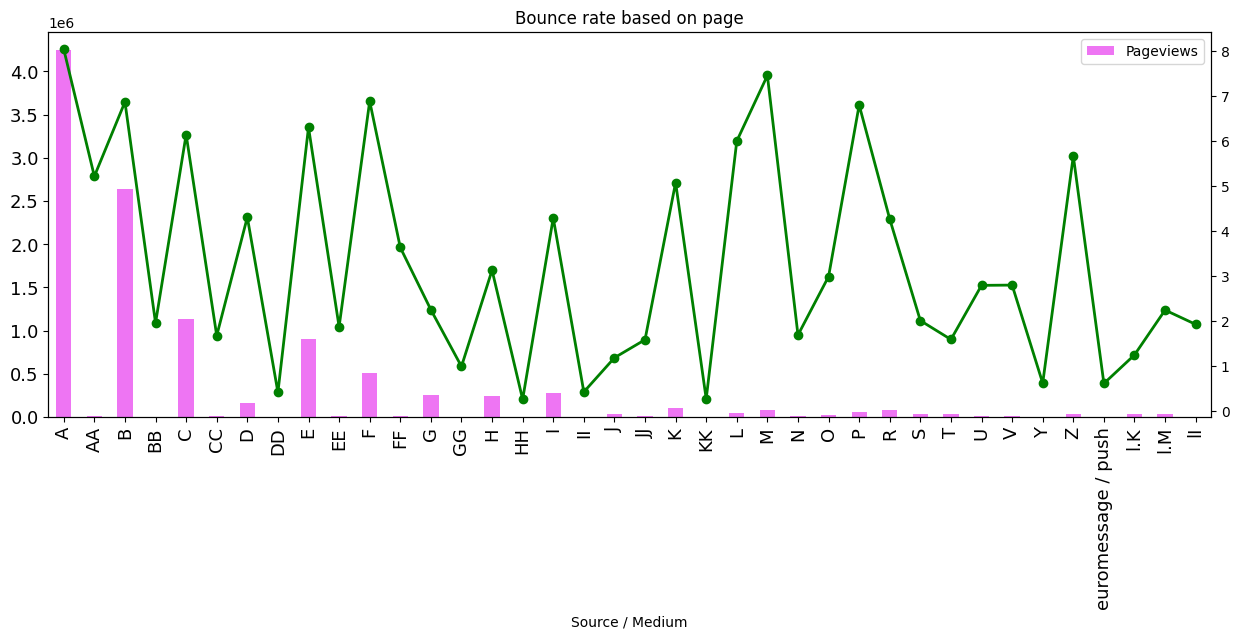

In [ ]:
#Doing a table
ax= bounce_rate.plot.bar(x='Source / Medium',
                       y='Pageviews',
                       figsize=(15,5),
                       color='#EE75F3',
                       fontsize=13,
                       title= 'Bounce rate based on page'
                      )
ax2=ax.twinx()
ax2.plot(bounce_rate["Bounce Rate"].values, linestyle ='-', marker='o', linewidth=2.0,color="green")

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
# set up plotly figure
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig2 = px.bar(bounce_rate, x='Source / Medium', y='Pageviews')

# add traces from plotly express figure to first figure
for t in fig2.select_traces():
    fig.add_trace(t, secondary_y = False)

fig.add_trace(go.Scatter(x=bounce_rate['Source / Medium'],y=bounce_rate['Bounce Rate'],mode = 'lines'), secondary_y = True)

# fix layout
fig.update_layout(legend_title_text = 'Bounce rate based on page')

fig.show()

- Highest bounce rate are from A,M,F,B,P
- Highest source of pageview are from source A, B, C, E, F



# Live Streaming Weather Data

In [ ]:
%cd /content/drive/MyDrive/Spacy_CV_PARSER_NER

/content/drive/MyDrive/Spacy_CV_PARSER_NER


# CASE STUDY
We are going to build a Predictive Model using customer visits data over a website.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import files
uploaded=files.upload()
import io
df2=pd.read_csv(io.BytesIO(uploaded['online_shoppers_intention.csv']))

Saving online_shoppers_intention.csv to online_shoppers_intention (2).csv


KeyError: ignored

In [ ]:
df2=pd.read_csv("/content/drive/MyDrive/Spacy_CV_PARSER_NER/online_shoppers_intention.csv")

# Steps 3 : Get the size of the data

In [ ]:
df2.shape

(12330, 18)

# Get first 10 records of dataset

In [ ]:
df2

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


# Step 5: Get the descriptive statistics of the dataset

In [ ]:
df2.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


# Step 6: Count of Missing values

In [ ]:
mv=df2.isnull().sum()
mv

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

# Explonatory Data Analysis to get data insight

# Step 7: Plotting the Percentage of customers have brought Revenue. ‘True’ means customer has bought the product and ‘False’ means customer didnot buy the product.

In [ ]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px


In [ ]:
df = pd.DataFrame()
df


""


In [ ]:
df = df2['Revenue'].values.sum()

In [ ]:
df = df2['Revenue'].sum()

In [ ]:
true_false_counts = df2['Revenue'].value_counts().reset_index()

true_false_counts

,index,Revenue
0,False,10422
1,True,1908


In [ ]:
 true_false_counts = true_false_counts.rename(columns = {'index':'Coune_FT'})

In [ ]:
true_false_counts

,Coune_FT,Revenue
0,False,10422
1,True,1908


In [ ]:
!pip install --upgrade plotly

In [ ]:
import plotly.io as pio
pio.renderers.default = 'colab'

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
fig = px.bar(df2['Revenue'].value_counts())
fig.show()